In [1]:
# We attempt to do a basic digit OCR task by implementing logistic regression

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from IPython.display import clear_output

In [3]:
data = sio.loadmat('ex3data1.mat')  #loading data from matlab file

In [4]:
X = data['X']
Y = data['y']

In [5]:
X.shape

(5000, 400)

In [6]:
Y.shape

(5000, 1)

In [7]:
X, Xtest, Y, Ytest = train_test_split(X,Y, test_size = 0.2, shuffle = True)

In [8]:
numimages = X.shape[0]
numpixels = X.shape[1]
numcharacters = 10

In [9]:
#Recoding the y matrix
Yrecoded = np.zeros((numimages, numcharacters))
Y = Y%10              #turning the '10' labels for 0 to 0
Ytest = Ytest%10

for i in range(numimages):
    Yrecoded[i][Y[i]] = 1

In [10]:
%matplotlib inline 
from matplotlib import pyplot as plt

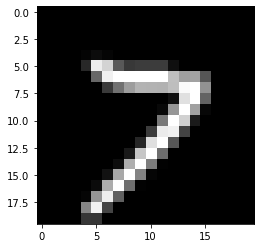

In [11]:
plt.imshow(X[3000].reshape(20,20).T,cmap='gray', vmin=0, vmax=1)
plt.show()

<Figure size 432x288 with 0 Axes>

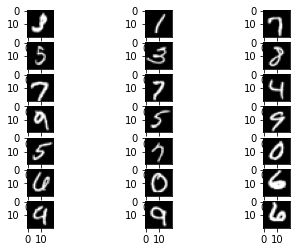

In [12]:
plt.figure()

gridrows = 7;
gridcolumns = 3;

gridsize = gridrows * gridcolumns;

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(gridrows,gridcolumns) 

# use the created array to output your multiple images. In this case made a 10 x 10 grid of random images from data

for i in range(gridrows):
    for j in range(gridcolumns):
        axarr[i][j].imshow(X[int(numimages / gridsize)  * (gridcolumns* i + j)].reshape(20,20).T,cmap='gray', vmin=0, vmax=1)

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def gradientdescent(X,Y,alpha, lmbda, maxiter):   # with regularization
    m = X.shape[0]
    numpixels = X.shape[1]
    numdigits = 10
    
    epsilon = 0.12
    
    Jiter = np.zeros(maxiter); 
    
    W = np.random.uniform(-epsilon, epsilon, (numdigits, numpixels))   # W is 10 by 400, X is 5000 by 400
    b = np.zeros((numdigits, 1))           # b is 10 by 1, 1 real value for each class
    
    tic = time.time()
    for i in range (maxiter):        
        Z = np.matmul(X, W.T) + b.T   # Z is 5000 by 10
        A = sigmoid(Z) 
        dZ = A - Y # 5000 by 10
        dW = 1 / m * np.matmul(dZ.T, X) # 10 by 400
        db =  (1 / m * np.sum(dZ, axis = 0, keepdims = 1)).T
        
        Jiter[i] = 1/m * (-(Y * np.log(A) + (1 - Y) * np.log(1 - A)).sum(axis = (1,0)) + lmbda / 2 * (W**2).sum(axis = (1,0)))

        W = W * (1 - alpha * lmbda / m) - alpha * (dW)
        b -= alpha * db
        
        clear_output(wait=True)
        print(f'Training Neural Network. Iteration number : {i + 1} / {maxiter}')
        print(f'Cost in current iteration : {"{:.3f}".format(Jiter[i])}')
        toc = time.time()
        print(f'Total time taken for training Neural Network : {"{:.1f}".format(toc-tic)} s')
        
    return [W,b, Jiter]    

In [15]:
Wopt , bopt, Jiter = gradientdescent(X,Yrecoded, alpha = 1, maxiter = 1000, lmbda = 1)

Training Neural Network. Iteration number : 1000 / 1000
Cost in current iteration : 0.602
Total time taken for training Neural Network : 17.0 s


Final Cost = 0.6024574179015794


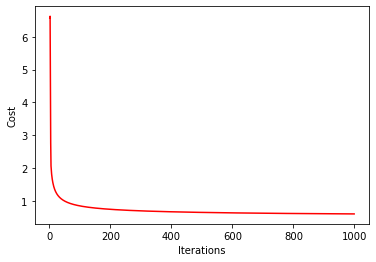

In [16]:
#Plotting cost function as a function of number of iterations of gradient descent

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(range(1,Jiter.size), Jiter[0:-1], 'r')

print(f'Final Cost = {Jiter[-1]}')

In [17]:
Ypred = sigmoid(X@Wopt.T + bopt.T)

In [18]:
Yencoded = np.argmax(Ypred, axis=1).reshape(X.shape[0],1)

In [19]:
trainaccuracy = sum(Yencoded == Y)[0] / Y.shape[0] * 100

In [20]:
print(f'Training set accuracy = {trainaccuracy}')

Training set accuracy = 93.89999999999999


In [21]:
import random
from IPython.display import clear_output

In [22]:
yn = 'Y'
while str.lower(yn) == 'y':
    imageid = random.randint(0,X.shape[0])
    plt.imshow(X[imageid].reshape(20,20).T,cmap='gray', vmin=0, vmax=1)
    plt.show()
    print(f'The prediction for the above picture is {Yencoded[imageid][0]}')
    print(f'The true label for the above picture is {Y[imageid][0]}')    
    clear_output(wait=True)
    yn = input('Do you want to see another one?(Y/N)')

Do you want to see another one?(Y/N)n


<Figure size 432x288 with 0 Axes>

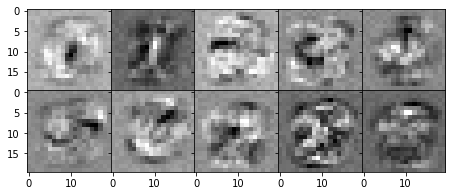

In [23]:
#Plotting the learned parameter W

plt.figure()

gridrows = 2;
gridcolumns = 5;

gridsize = gridrows * gridcolumns;

#subplot(r,c) provides the no. of rows and columns
f, axarr = plt.subplots(gridrows,gridcolumns, sharex = True, sharey = True ,figsize = (gridcolumns*1.5, gridrows*1.5),  
                        gridspec_kw={'wspace': 0,'hspace':0}) 

for i in range(gridrows):
    for j in range(gridcolumns):
        axarr[i][j].imshow(Wopt[gridcolumns* i + j].reshape(20,20).T,cmap='gray',  aspect = 'auto')

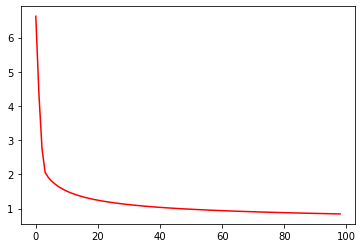

In [24]:
#Plotting cost function as a function of number of iterations of gradient descent

plt.plot(Jiter[1:100], 'r')

In [25]:
#Checking Test Set accuracy
Ypredtest = sigmoid(Xtest@Wopt.T + bopt.T)
Yencodedtest = np.argmax(Ypredtest, axis=1).reshape(Xtest.shape[0],1)
testaccuracy = sum(Yencodedtest == Ytest)[0] / Ytest.shape[0] * 100
print(f'Test set accuracy = {testaccuracy}')

Test set accuracy = 87.8


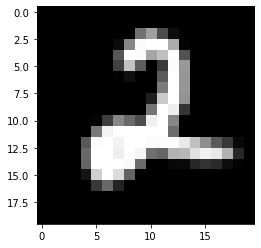

The prediction for the above picture is 2
The true label for the above picture is 2


In [ ]:
yn = 'Y'
while str.lower(yn) == 'y':
    imageid = random.randint(0,Xtest.shape[0])
    plt.imshow(Xtest[imageid].reshape(20,20).T,cmap='gray', vmin=0, vmax=1)
    plt.show()
    print(f'The prediction for the above picture is {Yencodedtest[imageid][0]}')
    print(f'The true label for the above picture is {Ytest[imageid][0]}')    
    clear_output(wait=True)
    yn = input('Do you want to see another one?(Y/N)')